In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
%matplotlib inline

primary_results = pd.read_csv( '../data/primary_results.csv' )
county_facts = pd.read_csv( '../data/county_facts.csv' )
county_facts_dict = pd.read_csv( '../data/county_facts_dictionary.csv' )

primary_results.index = primary_results['fips']
del primary_results['fips']

county_facts.index = county_facts['fips']
del county_facts['fips']

county_facts_dict.index = county_facts_dict['column_name']
del county_facts_dict['column_name']

county_facts_results = county_facts.loc[ sorted(list(set(primary_results.index))), : ]

Let's look at the correlation between education level by county and the fraction of votes for Trump.

In [3]:
trump_results = primary_results[ primary_results[ 'candidate' ] == 'Donald Trump' ]
trump_results = trump_results.sort_index()
trump_results.loc[:, 'percent_high_school'] = county_facts_results.loc[:, 'EDU635213' ]
trump_results.loc[:, 'percent_bachelors'] = county_facts_results.loc[:, 'EDU685213' ]

We define a function, CorrelationCoeff(X,Y) that calculates the Pearson product-moment correlation coefficient. This is effectively the same as np.corrcoef but I decided to write it myself to see the math.

In [5]:
def CorrelationCoeff(X,Y):
    mu_x = np.mean(X)
    mu_y = np.mean(Y)
    N = len(X)
    r = (sum([ X[i]*Y[i] for i in range(N) ]) - N*mu_x*mu_y) \
        / (math.sqrt( sum(X**2)-N*(mu_x**2) )) \
        / (math.sqrt( sum(Y**2)-N*(mu_y**2) ))
    return r

Create a scatter plot of the percent of people over 25 who have a high school diploma against the fraction of votes for Trump and calculate the correlation coefficient.

r = -0.545799193326


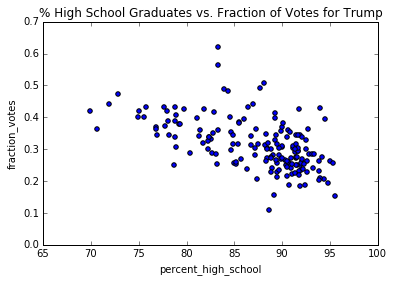

In [12]:
trump_results.plot( kind='scatter', x='percent_high_school', y='fraction_votes',
                    title='% High School Graduates vs. Fraction of Votes for Trump' )
X = trump_results.loc[:,'percent_high_school'].values
Y = trump_results.loc[:,'fraction_votes'].values
r = CorrelationCoeff(X,Y)
print('r = ' + str(r))

Now we do the same for the percent of people over 25 with at least a Bachelor's degree.

In [7]:
trump_results.plot( kind='scatter', x='percent_bachelors', y='fraction_votes',
                    title='% w/ Bachelor\'s or Higher vs. Fraction of Votes for Trump' )
X = trump_results.loc[:,'percent_bachelors'].values
r = CorrelationCoeff(X,Y)
print('r = ' + str(r))

r = -0.327623669208


We see that while there is decent negative correlation between Trump votes and high school education, the correlations fades slightly when we move to higher education.

Let's take a broader look at what factors (if any) are strongly correlated with votes for Trump.

In [8]:
trump_data = county_facts_results.copy()
trump_data.loc[:,'fraction_trump_votes'] = trump_results.loc[:,'fraction_votes'].values
del trump_data['area_name']
del trump_data['state_abbreviation']

corr_coef = np.zeros( (trump_data.shape[1]-1) )
Y = trump_data.loc[:,'fraction_trump_votes'].values
for i in range( corr_coef.shape[0] ):
    r = CorrelationCoeff( trump_data.iloc[:,i].values, Y )
    corr_coef[i] = r

high_pos_correls_ind = np.argpartition(corr_coef, -5)[-5:]
high_neg_correls_ind = np.argpartition(corr_coef, 5)[:5]
for i in high_pos_correls_ind:
    r = corr_coef[ i ]
    col_name = list(trump_data)[i]
    descrip = county_facts_dict.loc[ col_name, 'description' ]
    print(r, '=>', col_name, ':', descrip)
for i in high_neg_correls_ind:
    r = corr_coef[ i ]
    col_name = list(trump_data)[i]
    descrip = county_facts_dict.loc[ col_name, 'description' ]
    print(r, '=>', col_name, ':', descrip)

(0.40672375787172882, '=>', 'RHI225214', ':', 'Black or African American alone, percent, 2014')
(0.40730601678816586, '=>', 'RHI325214', ':', 'American Indian and Alaska Native alone, percent, 2014')
(0.42260601886587457, '=>', 'LFE305213', ':', 'Mean travel time to work (minutes), workers age 16+, 2009-2013')
(0.43286826102909864, '=>', 'RHI625214', ':', 'Two or More Races, percent, 2014')
(0.52447986169016847, '=>', 'PVY020213', ':', 'Persons below poverty level, percent, 2009-2013')
(-0.54579919332622884, '=>', 'EDU635213', ':', 'High school graduate or higher, percent of persons age 25+, 2009-2013')
(-0.53826096465961426, '=>', 'RHI825214', ':', 'White alone, not Hispanic or Latino, percent, 2014')
(-0.36983458926806523, '=>', 'INC110213', ':', 'Median household income, 2009-2013')
(-0.46410188934079311, '=>', 'RHI125214', ':', 'White alone, percent, 2014')
(-0.35483869853880573, '=>', 'INC910213', ':', 'Per capita money income in past 12 months (2013 dollars), 2009-2013')


It looks like Trump was right: he does have a reason to love the poorly educated. Also interestingly, counties with higher populations of white people were less likely to be a trump victory.

Where is Trump doing very well? It seems Trump votes are best positively correlated with areas of high poverty rates. To reinforce the idea that Trump does not do well with areas of white people: he's doing well in areas of multiethnic people, American Indians and Alaskan Natives, and Black or African Americans.

r = -0.53826096466


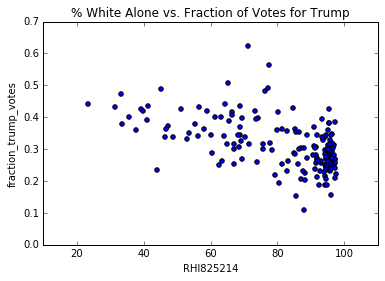

In [13]:
trump_data.plot( kind='scatter', x='RHI825214', y='fraction_trump_votes',
                    title='% White Alone vs. Fraction of Votes for Trump' )
X = trump_data.loc[:,'RHI825214'].values
r = CorrelationCoeff(X,Y)
print('r = ' + str(r))

r = 0.52447986169


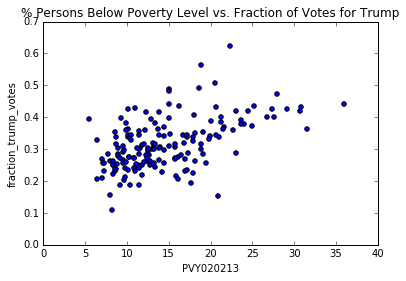

In [14]:
trump_data.plot( kind='scatter', x='PVY020213', y='fraction_trump_votes',
                    title='% Persons Below Poverty Level vs. Fraction of Votes for Trump' )
X = trump_data.loc[:,'PVY020213'].values
r = CorrelationCoeff(X,Y)
print('r = ' + str(r))